#  My Model for the Synthetic-to-Real Object Detection Challenge
Hello everyone,

I’ve developed a model for the Synthetic-to-Real Object Detection Challenge that aims to detect Cheerio boxes in real-world images, trained solely on synthetic data. This model addresses the challenge of overcoming the Sim2Real gap, and I’m excited to share it with the community. I would greatly appreciate any feedback and support as I continue to refine the model!

If you find the model useful, feel free to give it an **upvote** – your support means a lot to me! Let’s learn and grow together as we push the boundaries of synthetic data applications in real-world AI!

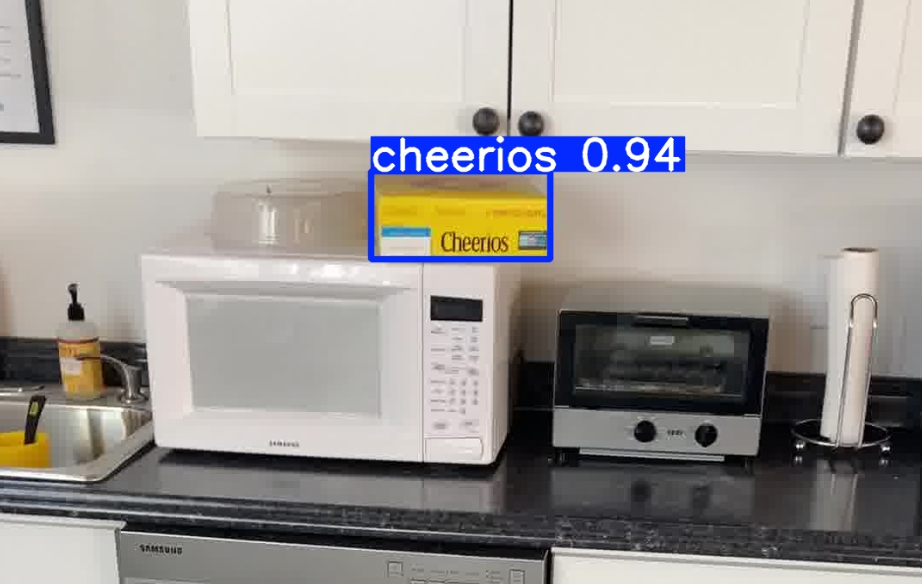

# Importing Required Libraries
This cell imports the necessary libraries used in the project. Libraries like Pandas, Numpy, Matplotlib, YOLO, Path, CSV, and OS are utilized for data processing, visualization, object detection, and file handling within the project.



In [1]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:1024"

In [2]:
import torch
import gc

def clear_gpu_memory():
    gc.collect()
    torch.cuda.empty_cache()

torch.cuda.is_available()

True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import csv
import os

# Creating the data.yaml File
This cell creates a 'data.yaml' configuration file required for training the model in the object detection challenge. The file specifies the path to the dataset, the locations of the training, validation, and test image directories, the number of object classes (1 in this case for 'cheerios'), and the names of those classes.

In [4]:
# data.yaml dosyasını oluştur
data_yaml = r"""
path: D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data

train: train/images
val: val/images
test: test/images

nc: 1
names: ['cheerios']
"""

# Dosyayı kaydet
with open('data.yaml', 'w') as file:
    file.write(data_yaml)


# Training the YOLOv8 Model
In this cell, we start training the YOLOv8 model (yolov8l.pt) using the dataset specified in the 'data.yaml' file. The model will be trained for 100 epochs, with the model being saved every 20 epochs. Hyperparameters such as learning rate, optimization algorithm, batch size, and image size are set here. Additionally, data augmentation techniques (such as color adjustments, horizontal/vertical flipping, translation, scaling, etc.) are applied to enhance the model's ability to generalize.

In [5]:
clear_gpu_memory()

In [6]:
torch.cuda.get_device_name()

'NVIDIA GeForce GTX 1650'

In [7]:
model = YOLO("yolov8l.pt")  

model.train(
    data="data.yaml",
    epochs=30,                
    batch=4,                   
    imgsz=640,
    patience=20,               
    optimizer='Adam',          
    lr0=0.001,                
    weight_decay=0.0001,       
    cos_lr=True,               
    save_period=5,             
    workers=2,
    # Augmentasyonlar
    hsv_h=0.03,
    hsv_s=0.6,
    hsv_v=0.3,
    flipud=0.5,
    fliplr=0.5,
    translate=0.2,
    scale=0.7,
    shear=0.05,
    device="cuda:0"
)

Ultralytics 8.3.101  Python-3.10.11 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=10, time=None, patience=20, batch=4, imgsz=640, save=True, save_period=20, cache=False, device=cuda:0, workers=2, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=T

train: Scanning D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\train\labels.cache... 431 images, 7 backgrounds, 0 corrupt: 100%|██████████| 431/431 [00:00<?, ?it/s]
val: Scanning D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\val\labels.cache... 69 images, 1 backgrounds, 0 corrupt: 100%|██████████| 69/69 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: Adam(lr=0.0005, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0001), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs\detect\train10
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      5.11G     0.5343      1.061     0.9157          3        640: 100%|██████████| 108/108 [20:07<00:00, 11.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.66s/it]

                   all         69         68      0.923      0.887      0.933      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      5.55G     0.5746     0.7887     0.9688          3        640: 100%|██████████| 108/108 [17:32<00:00,  9.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:41<00:00,  4.60s/it]

                   all         69         68      0.936      0.864      0.963      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      5.56G     0.5738      0.707      0.912          3        640: 100%|██████████| 108/108 [15:09<00:00,  8.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:36<00:00,  4.04s/it]

                   all         69         68      0.845      0.885      0.924       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      5.56G     0.5444     0.6363      0.916          3        640: 100%|██████████| 108/108 [16:47<00:00,  9.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:07<00:00,  7.53s/it]

                   all         69         68      0.956      0.954       0.99      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      5.52G     0.5102     0.5678     0.8835          3        640: 100%|██████████| 108/108 [16:10<00:00,  8.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:32<00:00,  3.56s/it]

                   all         69         68      0.902      0.985      0.982      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      5.56G     0.4555     0.4469      0.878          3        640: 100%|██████████| 108/108 [18:56<00:00, 10.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:32<00:00, 10.24s/it]

                   all         69         68      0.984      0.971      0.992      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      5.56G     0.4435     0.3946     0.8501          2        640: 100%|██████████| 108/108 [21:51<00:00, 12.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:58<00:00,  6.48s/it]

                   all         69         68      0.952      0.985      0.992      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      5.56G     0.4074     0.3771     0.8607          3        640: 100%|██████████| 108/108 [21:40<00:00, 12.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:35<00:00,  3.89s/it]

                   all         69         68      0.971      0.989      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.52G      0.381     0.3601     0.8537          2        640: 100%|██████████| 108/108 [14:19<00:00,  7.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:43<00:00,  4.80s/it]

                   all         69         68      0.982      0.985      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.54G     0.3331     0.3019      0.819          2        640: 100%|██████████| 108/108 [18:41<00:00, 10.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:58<00:00,  6.46s/it]

                   all         69         68      0.953      0.985      0.991      0.948



10 epochs completed in 3.171 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 87.6MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 87.6MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics 8.3.101  Python-3.10.11 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce GTX 1650, 4096MiB)
Model summary (fused): 112 layers, 43,607,379 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:08<00:00,  1.04it/s]


                   all         69         68      0.982      0.985      0.995      0.949
Speed: 0.9ms preprocess, 119.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\train10


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001C4833EB490>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

# Visualizing Training Metrics and Losses
* This cell reads the training metrics from the 'results.csv' file and visualizes key performance indicators.
* The first plot shows the mAP@50 and mAP@50-95 values over epochs, giving insights into the model's performance.
* The second plot displays training and validation losses (box loss and classification loss) over epochs, 
* helping to analyze the model's convergence and potential overfitting issues.

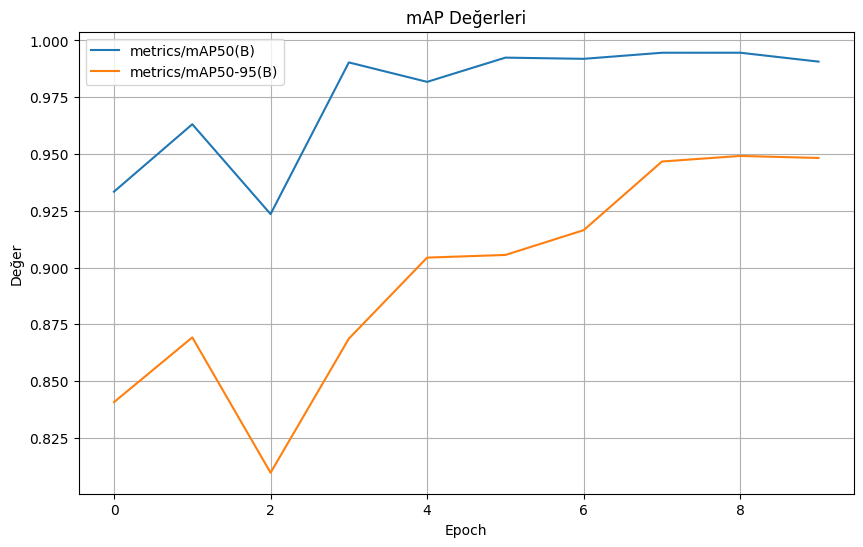

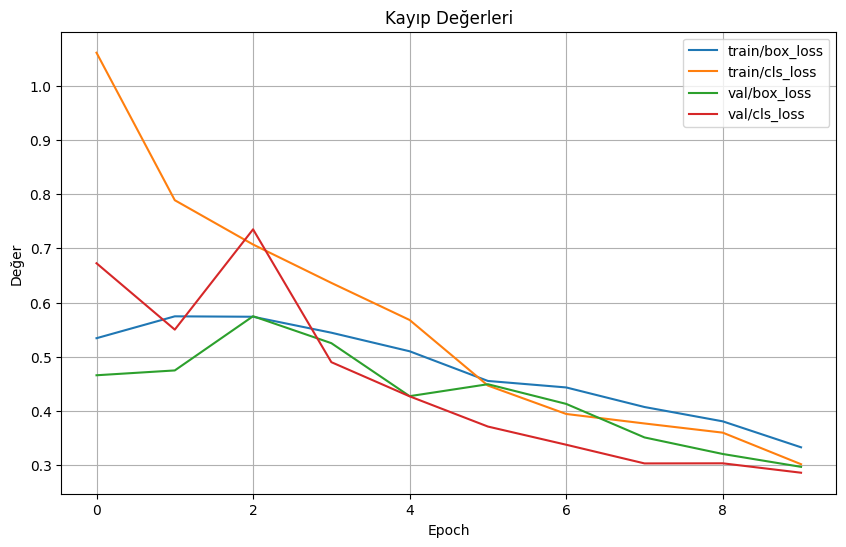

In [3]:
metrics_path = r"runs\detect\train11\results.csv"
metrics = pd.read_csv(metrics_path)

metrics[['metrics/mAP50(B)', 'metrics/mAP50-95(B)']].plot(figsize=(10, 6))
plt.title("mAP Values")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid()
plt.show()


metrics[['train/box_loss', 'train/cls_loss', 'val/box_loss', 'val/cls_loss']].plot(figsize=(10, 6))
plt.title("Loss Values")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid()
plt.show()


# Testing the Trained YOLOv8 Model and Saving Predictions
In this section, the trained YOLOv8 model (best.pt) is used to perform object detection on test images. The script iterates through all images in the test dataset directory and applies the model to generate predictions. The results are saved in YOLO format (.txt files), containing class ID, confidence score, and bounding box coordinates normalized by image dimensions. The output directory is automatically created if it doesn't exist. 

In [13]:
model = YOLO(r'runs\detect\train11\weights\best.pt')

test_images_path = r"D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images"
output_dir = r"predictions\labels"

os.makedirs(output_dir, exist_ok=True)

for img_path in Path(test_images_path).glob("*"):
    if img_path.suffix.lower() not in ['.png', '.jpg', '.jpeg']:
        continue

    results = model.predict(img_path, conf=0.05)  

    output_txt = Path(output_dir) / f"{img_path.stem}.txt"

    with open(output_txt, "w") as f:
        for result in results:
            img_height, img_width = result.orig_shape
            for box in result.boxes.data:
                x1, y1, x2, y2, confidence, cls_id = box.tolist()

                x_center = ((x1 + x2) / 2) / img_width
                y_center = ((y1 + y2) / 2) / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height

                f.write(f"0 {confidence:.6f} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

print(f"[notice] ✅ Predictions saved to: {output_dir}")


image 1/1 D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images\0002.jpg: 640x384 1 cheerios, 82.4ms
Speed: 2.7ms preprocess, 82.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images\0008 (2).jpg: 640x384 2 cheerioss, 79.9ms
Speed: 2.0ms preprocess, 79.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images\0008.jpg: 640x384 2 cheerioss, 79.5ms
Speed: 3.3ms preprocess, 79.5ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images\0010.jpg: 640x384 1 cheerios, 78.6ms
Speed: 2.9ms preprocess, 78.6ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 384)

image 1/1 D:\repositorios_pessoais\Synthetic to Real Object Detec

# Converting Predictions to a CSV File
This function converts the model's prediction outputs from .txt files into a CSV file. The process works as follows:

1. Scanning the Predictions Folder: It scans the specified directory (preds_folder) for .txt files and processes their contents.
2. Identifying Valid Test Images: The test image folder is scanned, and only files with the allowed extensions are selected.
3. Processing Predictions: Valid prediction lines from the .txt files are filtered, and detected objects are matched with their respective image_id.
4. Handling Missing Predictions: Any test images without predictions are identified and assigned the label "no boxes".
5. Saving in CSV Format: All predictions are converted into a pandas DataFrame and saved as the specified output_csv file.

This ensures the predictions are formatted correctly for submission in the competition.

In [14]:
def predictions_to_csv(
    preds_folder: str = r"predictions\labels", 
    output_csv: str = r"submission_epoch_30.csv", 
    test_images_folder: str = r"D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images",
    allowed_extensions: tuple = (".jpg", ".png", ".jpeg")
):
    preds_path = Path(preds_folder)
    test_images_path = Path(test_images_folder)

    test_images = {p.stem for p in test_images_path.glob("*") if p.suffix.lower() in allowed_extensions}

    predictions = []
    predicted_images = set()

    for txt_file in preds_path.glob("*.txt"):
        image_id = txt_file.stem
        predicted_images.add(image_id)

        with open(txt_file, "r") as f:
            valid_lines = [line.strip() for line in f if len(line.strip().split()) == 6]

        pred_str = " ".join(valid_lines) if valid_lines else "no boxes"
        predictions.append({"image_id": image_id, "prediction_string": pred_str})

    missing_images = test_images - predicted_images
    for image_id in missing_images:
        predictions.append({"image_id": image_id, "prediction_string": "no boxes"})

    submission_df = pd.DataFrame(predictions)
    submission_df.to_csv(output_csv, index=False, quoting=csv.QUOTE_MINIMAL)

    print(f"[notice] ✅ Submission saved to {output_csv}")


predictions_to_csv()


[notice] ✅ Submission saved to submissionv.csv


# Displaying Model Predictions on an Image
This code performs object detection on a specific test image using the trained YOLO model and then displays the predicted results.

In [ ]:
from PIL import Image

results = model.predict(source=r"D:\repositorios_pessoais\Synthetic to Real Object Detection Challenge\data\test\images\IMG_7702.jpg", conf=0.85, save=True)

Image.open(r'runs\detect\predict\IMG_7702.jpg')